***📊Jungbum Research***

#1️⃣DATASET LOAD + MERGE


In [68]:
from google.colab import drive
import pandas as pd
import glob
import os


# Merge 2018-2022 data and make a year column

drive.mount('/content/drive')


path = '/content/drive/MyDrive/EMS_data/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# this cell is used only for initial merges
# csv_files = glob.glob(os.path.join(path, 'mapped_merged2_*.csv'))
# print(csv_files)

In [70]:
# this cell is used only for initial merges
# dfs = []
# for file in csv_files:
#     year = os.path.basename(file).split('_')[-1].split('.')[0]  # e.g., 2018
#     df = pd.read_csv(file)
#     df['Year'] = int(year)
#     dfs.append(df)

# merged_df = pd.concat(dfs, ignore_index=True)


In [71]:
# this cell is used only for initial merges
# print(merged_df.shape)
# merged_df.to_csv('/content/drive/MyDrive/EMS_data/merged_all_years.csv', index=False)

In [72]:
#This cell will be used only in Future uses.(Brings the whole merged df)
merged_df = pd.read_csv('/content/drive/MyDrive/EMS_data/merged_all_years.csv')

/tmp/ipython-input-3738280778.py:2: DtypeWarning:

Columns (1,2,15,26,27) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
import pandas as pd


#the code to masample the dataset for streamlt visualization ( the whole dataset is too big)

sampled_df = merged_df.sample(n=100000, random_state=42)


sampled_df.to_csv('sampled_ems_data_100k.csv', index=False)


print("Datasize before sampling:", merged_df.shape)
print("Datasize after smapling:", sampled_df.shape)
print("'sampled_ems_data_100k.csv' is good to go")

Datasize before sampling: (6141072, 28)
Datasize after smapling: (100000, 28)
'sampled_ems_data_100k.csv' is good to go


#2️⃣IDA



##Dataset Overlook

In [74]:
#Start the IDA - taking a look of the data. I also had a column of my language to interpret the columns more precisely
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141072 entries, 0 to 6141071
Data columns (total 28 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   PcrKey                             float64
 1   USCensusRegion                     object 
 2   USCensusDivision                   object 
 3   NasemsoRegion                      object 
 4   Urbanicity                         object 
 5   ageinyear                          float64
 6   EMSDispatchCenterTimeSec           float64
 7   EMSChuteTimeMin                    float64
 8   EMSSystemResponseTimeMin           float64
 9   EMSSceneResponseTimeMin            float64
 10  EMSSceneTimeMin                    float64
 11  EMSSceneToPatientTimeMin           float64
 12  EMSTransportTimeMin                float64
 13  EMSTotalCallTimeMin                float64
 14  Gender                             object 
 15  ePatient_15                        object 
 16  Age Units         

 🧾 EMS Dataset Variable Classification by Data Type

| Column Name | Type | Subtype | Description (English) | 설명 (한국어 해석) |
|--------------|-------|----------|------------------------|----------------------|
| **PcrKey** | Numeric | Discrete | Patient Care Record Key | EMS 출동마다 부여되는 고유 식별번호 (집계용, 모델 입력 X) |
| **USCensusRegion** | Categorical | Nominal | U.S. Census Region (4) | 미국 인구조사국의 4개 대분류 지역 |
| **USCensusDivision** | Categorical | Nominal | U.S. Census Division (9) | 인구조사국의 9개 세부 구역 |
| **NasemsoRegion** | Categorical | Nominal | NASEMSO Regional Group | 응급의료 행정구역 구분 |
| **Urbanicity** | Categorical | Ordinal | Urban–Rural Classification | 도시–교외–농촌 등 지역 유형 (순서 존재) |
| **ageinyear** | Numeric | Continuous | Patient Age in Years | 환자의 나이 (단위: 세) |
| **EMSDispatchCenterTimeSec** | Numeric | Continuous | Dispatch Center Time (sec) | 콜 수신 후 출동 준비 시간 |
| **EMSChuteTimeMin** | Numeric | Continuous | Chute Time (min) | 출동 결정 후 차량 출발까지의 시간 |
| **EMSSystemResponseTimeMin** | Numeric | Continuous | System Response Time (min) | 신고 시점부터 현장 도착까지의 총 시간 |
| **EMSSceneResponseTimeMin** | Numeric | Continuous | Scene Response Time (min) | 출동 후 현장 도착까지의 시간 |
| **EMSSceneTimeMin** | Numeric | Continuous | Scene Time (min) | 현장 체류 시간 (환자 처치 등) |
| **EMSSceneToPatientTimeMin** | Numeric | Continuous | Scene to Patient Contact Time (min) | 현장 도착 후 환자 접촉까지의 시간 |
| **EMSTransportTimeMin** | Numeric | Continuous | Transport Time (min) | 환자 병원이송 시간 |
| **EMSTotalCallTimeMin** | Numeric | Continuous | Total Call Time (min) | 신고~병원 도착까지 전체 시간 |
| **Gender** | Categorical | Nominal | Patient Gender | 환자 성별 (Male/Female/Unknown 등) |
| **ePatient_15** | Categorical | Nominal | Age or DOB Text | 환자 생년월일/나이 텍스트 (비공식 필드) |
| **Age Units** | Categorical | Nominal | Unit of Age Measurement | 나이 단위 (Years, Months, Days 등) |
| **Possible Injury** | Categorical | Binary | Possible Injury Indicator | 부상 여부 (Yes/No/Unknown) |
| **Chief Complaint Anatomic Location** | Categorical | Nominal | Anatomic Location of Chief Complaint | 주요 증상의 신체 부위 (Head, Chest 등) |
| **Chief Complaint Organ System** | Categorical | Nominal | Organ System of Chief Complaint | 증상 관련 신체 시스템 (예: Nervous, Musculoskeletal 등) |
| **eSituation_13** | Numeric | Discrete | Primary Impression (Code) | EMS가 기록한 1차 진단 코드 (정수형) |
| **eSituation_01** | Categorical | Nominal | Complaint Reported by Dispatch | 신고 시 보고된 환자 상태 (텍스트) |
| **PcrPatientRaceGroupKey** | Numeric | Discrete | Race Group Key | 인종 그룹 식별용 숫자 코드 |
| **Race** | Categorical | Nominal | Patient Race | 환자 인종 (White, Black, Asian 등) |
| **Primary Symptom** | Categorical | Nominal | Primary Symptom Text | 주요 증상 (Chest Pain, Headache 등) |
| **Year** | Numeric | Discrete | Data Year | 데이터 수집 연도 (2018~2022) |
| **CensusRegion** | Categorical | Nominal | US Census Region | 중복된 지역 필드 (USCensusRegion과 동일) |
| **CensusDivision** | Categorical | Nominal | US Census Division | 중복된 세부 구역 필드 (USCensusDivision과 동일) |

---


 This cell was assisted by GPT-5.0  (October 10, 2025)



In [75]:
#Taking a look of count, mean ...
merged_df.describe()

,PcrKey,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,eSituation_13,PcrPatientRaceGroupKey,Year
count,6.141072e+06,6.104698e+06,4.328007e+06,6.081304e+06,6.119799e+06,6.113694e+06,4.439969e+06,5.926440e+06,3.914661e+06,6.129996e+06,6.141072e+06,6.141072e+06,6.141072e+06
mean,1.257124e+08,3.833573e+01,1.401515e+02,1.395356e+00,1.026895e+01,7.102526e+00,1.761083e+01,1.796114e+00,1.615762e+01,5.841889e+01,4.112135e+06,1.678576e+08,2.020478e+03
std,6.080899e+07,1.955784e+01,3.024711e+02,2.702397e+00,2.432627e+01,8.920100e+00,1.491807e+01,6.010924e+00,1.541003e+01,4.248827e+01,2.159261e+06,7.968178e+07,1.245122e+00
min,8.464333e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.813001e+06,1.062123e+07,2.018000e+03
25%,7.407387e+07,2.300000e+01,6.000000e+00,1.333333e-01,4.416667e+00,3.283333e+00,1.013333e+01,5.000000e-01,7.966667e+00,3.200000e+01,2.813005e+06,1.007102e+08,2.019000e+03
50%,1.286989e+08,3.500000e+01,5.000000e+01,9.166667e-01,6.800000e+00,5.500000e+00,1.500000e+01,1.000000e+00,1.263333e+01,5.178333e+01,2.813005e+06,1.717999e+08,2.021000e+03
75%,1.769419e+08,5.300000e+01,1.200000e+02,1.666667e+00,1.031667e+01,9.000000e+00,2.121667e+01,1.716667e+00,2.000000e+01,7.403333e+01,7.701001e+06,2.332211e+08,2.022000e+03
max,2.361673e+08,1.200000e+02,3.599000e+03,5.900000e+01,1.436300e+03,1.437933e+03,1.435000e+03,7.189667e+02,1.434133e+03,1.439000e+03,7.701003e+06,3.134157e+08,2.022000e+03


In [76]:
#Take look of the first part of the whole dataset
pd.set_option('display.max_columns', None)
merged_df.head(200)

,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,Gender,ePatient_15,Age Units,Possible Injury,Chief Complaint Anatomic Location,Chief Complaint Organ System,eSituation_13,eSituation_01,PcrPatientRaceGroupKey,Race,Primary Symptom,Year,CensusRegion,CensusDivision
0,8464333.0,West,Mountain,West,Urban,9.0,0.0,0.000000,7.000000,7.000000,12.000000,2.000000,5.000000,41.000000,Male,9.0,Years,Yes,General/Global,Global/General,2813005,2018-01-04 07:59:00,10621228.0,Black or African American,Hemorrhage NOS,2018,NaN,NaN
1,8553300.0,West,Mountain,West,Urban,20.0,0.0,0.000000,7.000000,7.000000,21.000000,0.000000,6.000000,53.000000,Male,20.0,Years,Yes,General/Global,Global/General,2813001,2018-01-04 20:42:00,10740814.0,White,Hemorrhage NOS,2018,NaN,NaN
2,8654647.0,South,South Atlantic,East,Urban,23.0,NaN,1.066667,26.550000,25.483333,8.666667,1.516667,9.850000,99.550000,Male,23.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10858523.0,Black or African American,Pain in unspecified limb,2018,NaN,NaN
3,8654743.0,South,South Atlantic,East,Urban,5.0,NaN,1.816667,10.883333,9.066667,NaN,NaN,NaN,52.083333,Female,5.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10858621.0,Black or African American,Encounter for routine child health examination...,2018,NaN,NaN
4,8655068.0,South,South Atlantic,East,Urban,56.0,NaN,0.866667,2.883333,2.016667,NaN,0.366667,NaN,42.116667,Male,56.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10858952.0,Black or African American,Back pain NOS,2018,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8776890.0,South,South Atlantic,South Central,Urban,26.0,NaN,3.050000,7.483333,4.433333,5.683333,4.916667,6.233333,22.400000,Female,26.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10989244.0,Not Applicable,Back pain NOS,2018,NaN,NaN
196,8776922.0,South,South Atlantic,South Central,Urban,30.0,NaN,1.033333,1.783333,0.750000,12.683333,0.983333,21.300000,38.766667,Female,30.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10987067.0,Not Applicable,Cervicalgia,2018,NaN,NaN
197,8777008.0,South,South Atlantic,South Central,Urban,45.0,NaN,0.583333,5.483333,4.900000,8.800000,2.483333,11.416667,56.316667,Male,45.0,Years,Yes,Not Applicable,Not Applicable,7701003,Not Recorded,10986883.0,Black or African American,Cervicalgia,2018,NaN,NaN
198,8777071.0,South,South Atlantic,South Central,Urban,82.0,NaN,0.750000,4.516667,3.766667,11.900000,0.600000,3.400000,32.816667,Female,82.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10987470.0,White,Stupor,2018,NaN,NaN


##Checking and handling data duplication (PcrKey)


In [77]:
#Check if there is duplicated data by using Pcrkey as a 'primary key'
total_count = len(merged_df)
unique_count = merged_df['PcrKey'].nunique()

print(f"Total count: {total_count:,}")
print(f"Unique PcrKey count: {unique_count:,}")
print(f"Duplicated Rows: {total_count - unique_count:,}")


Total count: 6,141,072
Unique PcrKey count: 6,092,303
Duplicated Rows: 48,769


There are some duplicates on the Pcrkey!

In [78]:
#After knowing we have duplicated Pcrkeys(which makes it not the primarykey), Check if the row is totally duplicated
dup_full = merged_df[merged_df.duplicated(keep=False)]
print(len(dup_full))

0


But thet aren't totally identical rows!(which makes it more harder)

We could now think if the following things could happened.

1. Cross-year duplicates (same incident recorded across different years)
2. Multi-patient duplicates (multiple patients under the same incident ID)
3. Revision-like duplicates (updated or re-uploaded versions of the same record)



In [79]:
# Pcrkey duplicates
dup_keys = merged_df['PcrKey'].value_counts()
dup_keys = dup_keys[dup_keys > 1].index

dup_df = merged_df[merged_df['PcrKey'].isin(dup_keys)]
print("Total Duplicate related rows: ", len(dup_df))
#  (a)  if Cross-year
cross_year = dup_df.groupby('PcrKey')['Year'].nunique().value_counts()
print("Year duplicates:\n", cross_year)

#  (b) if it's a Multi-patient case
multi_patient = dup_df.groupby('PcrKey')[['Gender', 'ageinyear']].nunique()
multi_patient['is_multi'] = (multi_patient['Gender'] > 1) | (multi_patient['ageinyear'] > 1)
print("multi-patient case:", multi_patient['is_multi'].sum())

#  (c)Revision
time_cols = [c for c in merged_df.columns if 'Time' in c]
revision_like = dup_df.groupby('PcrKey')[time_cols].nunique().max(axis=1) > 1
print("different time same record cases:", revision_like.sum())


Total Duplicate related rows:  87719
Year duplicates:
 Year
1    38950
Name: count, dtype: int64
multi-patient case: 0
different time same record cases: 0


However, looking at the results, most cases didn’t get caught even across years, and the other two cases have a count of zero. In this situation, we could suspect soft duplicates, but it’s unlikely for the match rate to be this low. So, in the next step, I’ll just group the overlapping records and compare the columns directly.


In [80]:
#  Filter only duplicate Pcrkeys
dup_keys = merged_df['PcrKey'].value_counts()
dup_keys = dup_keys[dup_keys > 1].index  # if pcrkeys

dup_df = merged_df[merged_df['PcrKey'].isin(dup_keys)]


pd.set_option('display.max_columns', None)
print(f"Duplicated Pcrkey rows: {len(dup_df):,}")
dup_df.head(50)

Duplicated Pcrkey rows: 87,719


,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,Gender,ePatient_15,Age Units,Possible Injury,Chief Complaint Anatomic Location,Chief Complaint Organ System,eSituation_13,eSituation_01,PcrPatientRaceGroupKey,Race,Primary Symptom,Year,CensusRegion,CensusDivision
149,8775261.0,South,South Atlantic,South Central,Urban,32.0,NaN,0.750000,8.466667,7.716667,22.133333,1.400000,16.916667,60.366667,Male,32.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10985774.0,White,Syncope and collapse,2018,NaN,NaN
150,8775261.0,South,South Atlantic,South Central,Urban,32.0,NaN,0.750000,8.466667,7.716667,22.133333,1.400000,16.916667,60.366667,Male,32.0,Years,Yes,Not Applicable,Not Applicable,7701001,Not Recorded,10985773.0,Hispanic or Latino,Syncope and collapse,2018,NaN,NaN
289,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637949.0,White,NaN,2018,NaN,NaN
290,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637948.0,Native Hawaiian or Other Pacific Islander,NaN,2018,NaN,NaN
291,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637947.0,Hispanic or Latino,NaN,2018,NaN,NaN
292,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637946.0,Black or African American,NaN,2018,NaN,NaN
293,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637945.0,Asian,NaN,2018,NaN,NaN
294,8809944.0,West,Pacific,West,Urban,18.0,120.0,2.000000,5.000000,3.000000,NaN,0.000000,NaN,22.866667,Female,18.0,Years,Yes,General/Global,Global/General,2813005,Not Recorded,11637944.0,American Indian or Alaska Native,NaN,2018,NaN,NaN
710,8859421.0,West,Pacific,West,Urban,19.0,107.0,1.183333,11.266667,10.083333,12.533333,2.533333,9.000000,91.800000,Male,19.0,Years,Yes,Head,Musculoskeletal/Skin,2813003,2018-01-01 01:39:28,11638156.0,White,Headache,2018,NaN,NaN
711,8859421.0,West,Pacific,West,Urban,19.0,107.0,1.183333,11.266667,10.083333,12.533333,2.533333,9.000000,91.800000,Male,19.0,Years,Yes,Head,Musculoskeletal/Skin,2813003,2018-01-01 01:39:28,11638155.0,Native Hawaiian or Other Pacific Islander,Headache,2018,NaN,NaN


Then, surprisingly, it turned out that there seem to be mistakes related to race — and in some cases, multiple errors per record. Since there’s really no practical way to fix this, it’s probably best to just delete all the duplicates altogether.
I could say it's MCAR in a duplicate version.

In [81]:
#Duplicate deleting code
#rows before removing
before_rows = len(merged_df)
print(f"Before removing duplicates: {before_rows:,} rows")

#  remove by pcrkey
merged_df = merged_df.drop_duplicates(subset=['PcrKey'], keep=False)


after_rows = len(merged_df)
print(f"After removing duplicates: {after_rows:,} rows")


print(f"Removed {before_rows - after_rows:,} duplicate rows based on PcrKey.")


Before removing duplicates: 6,141,072 rows
After removing duplicates: 6,053,353 rows
Removed 87,719 duplicate rows based on PcrKey.


And now we are good to go without any duplicates

##Checking and handling missing data ('ageinyear' and 'Age Units')




First, I tried to get the whole heatmap for the dataset, which crashed because of RAM limitation (over 6M * 28 data)

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
##Code for whole heatmap of dataset (which crashed due to limited RAM )

# plt.figure(figsize=(8,6))
# sns.heatmap(merged_df.isnull(), cbar=False, cmap="viridis")
# plt.title("Missing Values Heatmap")
# plt.show()


So, I went for the sampled data (start with 100,000 rows)


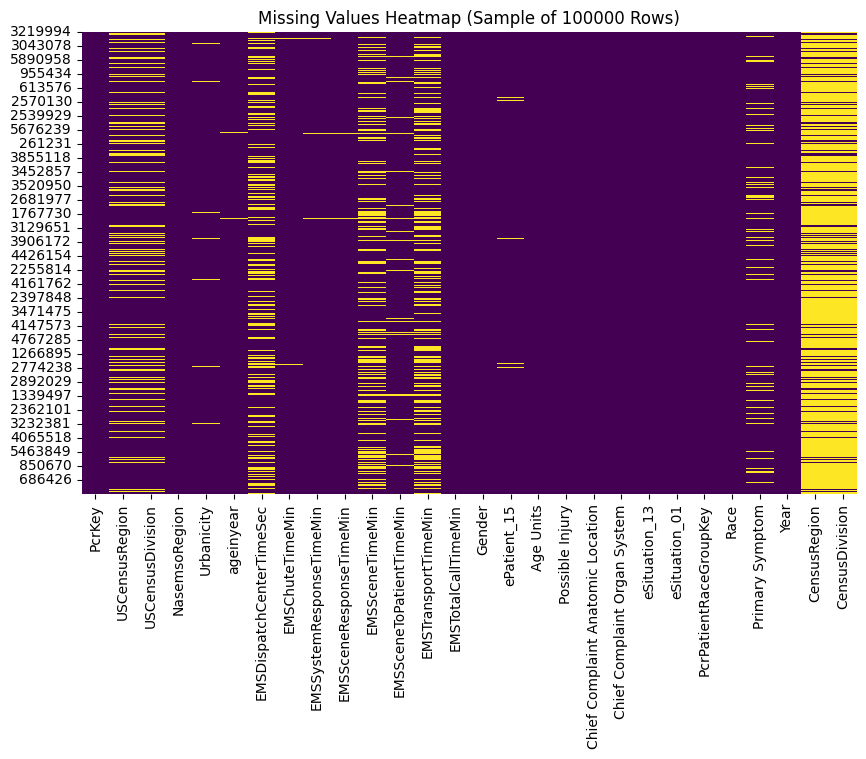

In [84]:
#sample 100,000 rows missing value heatmap
sample_df = merged_df.sample(100000, random_state=42)

#show the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sample_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Sample of 100000 Rows)")
plt.show()

And then had another plot to make sure how much data I am missing with each column


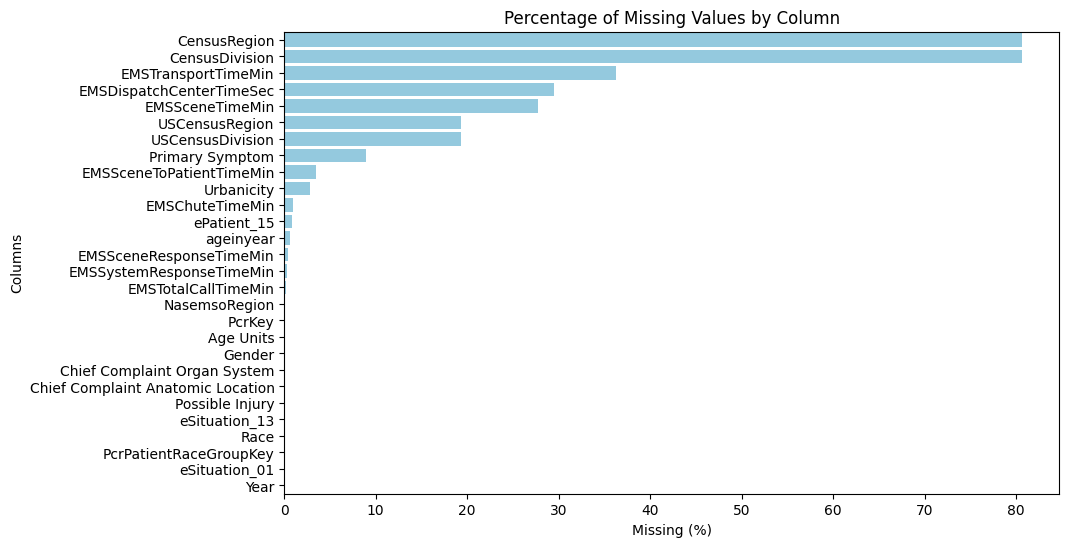

In [85]:
#Plot for Percentage of Missing Values by Column
missing = merged_df.isnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, color="skyblue")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Missing (%)")
plt.ylabel("Columns")
plt.show()


But this is actually excluding the semantic missing values, so I needed a function to replace the data

In [86]:
import numpy as np
import pandas as pd

common_nulls = [
    "not recorded", "not applicable", "not known", "unknown", "missing",
    "none", "null", "n/a", "na", "not available", "refused", "blank", "", "nan"
]

def normalize_and_replace_nulls(df):
    dfc = df.copy()
    for col in dfc.columns:
        if pd.api.types.is_object_dtype(dfc[col]) or pd.api.types.is_string_dtype(dfc[col]):
            # if it is Nan, leave it alone. only target semantic misiing values
            dfc[col] = dfc[col].where(
                dfc[col].isna(),
                dfc[col].astype(str).str.lower().str.strip()
            )
            # SMV -> Nan
            dfc[col] = dfc[col].replace(common_nulls, np.nan)
    return dfc


# make a new df for it.( now we will use this)
merged_NullReplaced_df = normalize_and_replace_nulls(merged_df)


And then start again with the sampled heatmaps and plot

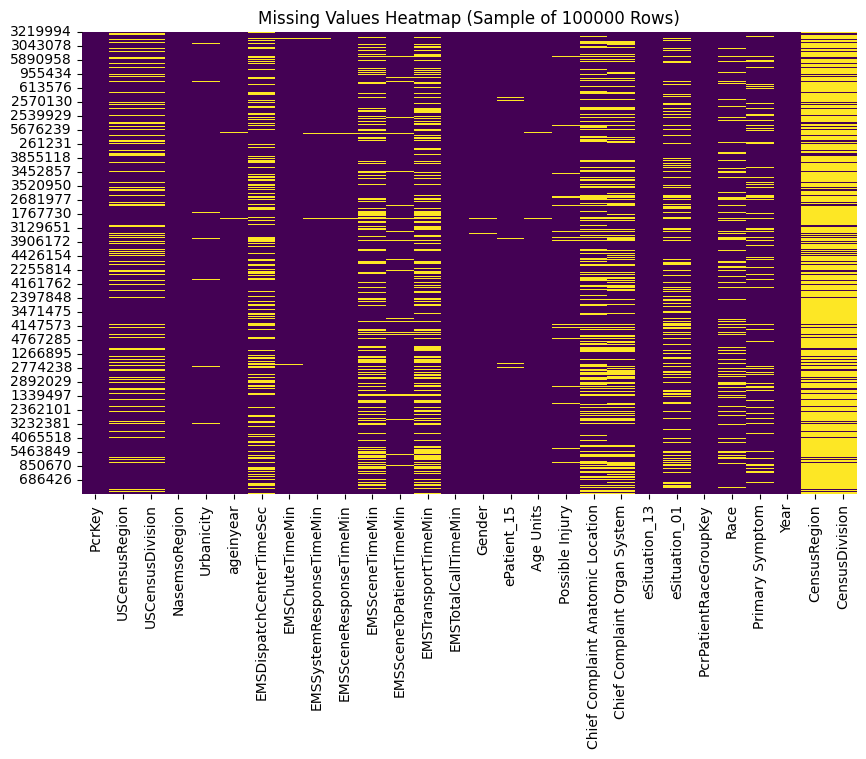

In [87]:
#sample 100,000 rows missing value heatmap
sample_df = merged_NullReplaced_df.sample(100000, random_state=42)

#show the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sample_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Sample of 100000 Rows)")
plt.show()

Now, it is much better. We now see all the Nan that actually exist.


##Now we take a look what the Age unit does to the age in year( because if the ageinyear column is 11 and the age unit is 'month' it needs to be normalized)


In [88]:
import plotly.express as px


age_units_counts = (
    merged_NullReplaced_df['Age Units']
    .fillna('Missing')
    .value_counts()
    .reset_index()
)
age_units_counts.columns = ['Age Units', 'Count']


fig = px.bar(
    age_units_counts,
    x='Age Units',
    y='Count',
    color='Age Units',
    text='Count',
    title='Distribution of Age Units',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title='Age Units',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    showlegend=False,
    title_x=0.5
)

fig.update_traces(
    texttemplate='%{text:,}',
    textposition='outside'
)

fig.show()


In [89]:
# Which are not 'year' in [Age unit] (Nan including)
non_years_df = merged_NullReplaced_df[merged_NullReplaced_df['Age Units'].fillna('Missing') != 'years']

# how many are they
print(f"Count of rows that are not in \'year\': {len(non_years_df):,}")

#I would only look at age in year and Age units
non_years_subset = non_years_df[['ageinyear', 'Age Units']]

# lets take a look on the first 200ish
non_years_subset.head(200)


Count of rows that are not in 'year': 54,790


,ageinyear,Age Units
131,0.0,months
148,0.0,months
585,0.0,months
670,0.0,months
772,0.0,months
...,...,...
14033,NaN,NaN
14046,NaN,NaN
14047,NaN,NaN
14055,NaN,NaN


Initially take the rows which Ageunit is not 'year'


**Ask professor if it is okay**

In [90]:
# filter rows which 'Age units' != years
non_years = merged_NullReplaced_df[merged_NullReplaced_df['Age Units'].fillna('').str.lower() != 'years']

print(f"Row count that would be deleted: {len(non_years):,}")

# Delete
# data frame changes again here!
merged_clean_df = merged_NullReplaced_df[merged_NullReplaced_df['Age Units'].fillna('').str.lower() == 'years']

print(f"Row count after deletion: {len(merged_clean_df):,}")


Row count that would be deleted: 54,790
Row count after deletion: 5,998,563


And before we really make the age groups, we could do a simple mean imputation for ageinyear column like this.

I guess this imputation method could be negotiatable later.

In [91]:
# #code for MEAN imputation, but not efficient (because it makes everything into 1 age group)

# # Check how many missing values exist in the 'ageinyear' column
# missing_age_count = merged_clean_df['ageinyear'].isna().sum()
# print(f"Number of missing age values before imputation: {missing_age_count:,}")

# # Calculate the mean age (excluding NaN)
# mean_age = merged_clean_df['ageinyear'].mean()

# # Replace missing values with the mean age (Mean Imputation)
# merged_clean_df['ageinyear'] = merged_clean_df['ageinyear'].fillna(mean_age)

# # Verify the result
# print(f"Mean age used for imputation: {mean_age:.2f}")
# print(f"Number of missing age values after imputation: {merged_clean_df['ageinyear'].isna().sum()}")


In [94]:
#code for schotastic regression!
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = merged_clean_df.copy()

# 1) Lightweight predictors (numeric only; fast on 6M rows)
predictors = ['Urbanicity_code', 'Year', 'EMSTotalCallTimeMin']
predictors = [p for p in predictors if p in df.columns]

# Ensure numeric dtype (safeguard)
for c in predictors + ['ageinyear']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2) Split complete/missing cases
complete = df.dropna(subset=predictors + ['ageinyear'])
missing  = df[df['ageinyear'].isna()]

print(f"Complete cases: {len(complete):,}")
print(f"Missing cases:  {len(missing):,}")

if len(missing) == 0:
    print("No missing 'ageinyear' values detected. Imputation skipped.")
else:
    # 3) Fit regression on complete cases
    Xc = complete[predictors].values
    yc = complete['ageinyear'].values
    model = LinearRegression()
    model.fit(Xc, yc)

    # 4) Prepare X for missing: impute predictor NaNs with medians from complete
    medians = complete[predictors].median()
    Xm = missing[predictors].copy()
    Xm = Xm.fillna(medians)

    # 5) Predict and add stochastic noise based on residual SD
    pred = model.predict(Xm.values)
    resid = yc - model.predict(Xc)
    resid_std = np.nanstd(resid)

    rng = np.random.default_rng(42)  # reproducible noise
    pred_stoch = pred + rng.normal(0, resid_std, size=len(pred))

    # 6) Clip to realistic range and fill back
    pred_stoch = np.clip(pred_stoch, 0, 110)
    df.loc[df['ageinyear'].isna(), 'ageinyear'] = pred_stoch

    print("Stochastic regression imputation completed.")
    print("Remaining missing ages:", df['ageinyear'].isna().sum())
    print(f"Imputed age mean ± sd: {pred_stoch.mean():.2f} ± {pred_stoch.std():.2f}")

# Hand result back
merged_clean_df = df


Complete cases: 5,987,820
Missing cases:  0
No missing 'ageinyear' values detected. Imputation skipped.


And then the grouping starts

In [95]:
# Define bins and labels for age group classification
bins = [0, 24, 34, 44, 54, 64, 74, 84, float('inf')]
labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# Create a new column 'AgeGroup' using pd.cut() based on the bins
merged_clean_df['AgeGroup'] = pd.cut(
    merged_clean_df['ageinyear'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Display confirmation and value distribution
print(" 'AgeGroup' column created successfully!")
print(merged_clean_df['AgeGroup'].value_counts().sort_index())


 'AgeGroup' column created successfully!
AgeGroup
0-24     1724296
25-34    1213298
35-44     899785
45-54     763031
55-64     701702
65-74     429868
75-84     202992
85+        63591
Name: count, dtype: int64


In [96]:
#just to see if the column is successfully created
merged_clean_df.head(50)

,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,Gender,ePatient_15,Age Units,Possible Injury,Chief Complaint Anatomic Location,Chief Complaint Organ System,eSituation_13,eSituation_01,PcrPatientRaceGroupKey,Race,Primary Symptom,Year,CensusRegion,CensusDivision,AgeGroup
0,8464333.0,west,mountain,west,urban,9.0,0.0,0.000000,7.000000,7.000000,12.000000,2.000000,5.000000,41.000000,male,9.0,years,yes,general/global,global/general,2813005,2018-01-04 07:59:00,10621228.0,black or african american,hemorrhage nos,2018,NaN,NaN,0-24
1,8553300.0,west,mountain,west,urban,20.0,0.0,0.000000,7.000000,7.000000,21.000000,0.000000,6.000000,53.000000,male,20.0,years,yes,general/global,global/general,2813001,2018-01-04 20:42:00,10740814.0,white,hemorrhage nos,2018,NaN,NaN,0-24
2,8654647.0,south,south atlantic,east,urban,23.0,NaN,1.066667,26.550000,25.483333,8.666667,1.516667,9.850000,99.550000,male,23.0,years,yes,NaN,NaN,7701001,NaN,10858523.0,black or african american,pain in unspecified limb,2018,NaN,NaN,0-24
3,8654743.0,south,south atlantic,east,urban,5.0,NaN,1.816667,10.883333,9.066667,NaN,NaN,NaN,52.083333,female,5.0,years,yes,NaN,NaN,7701001,NaN,10858621.0,black or african american,encounter for routine child health examination...,2018,NaN,NaN,0-24
4,8655068.0,south,south atlantic,east,urban,56.0,NaN,0.866667,2.883333,2.016667,NaN,0.366667,NaN,42.116667,male,56.0,years,yes,NaN,NaN,7701001,NaN,10858952.0,black or african american,back pain nos,2018,NaN,NaN,55-64
5,8655095.0,south,south atlantic,east,urban,28.0,NaN,0.683333,9.366667,8.683333,4.366667,1.000000,6.633333,36.366667,male,28.0,years,yes,general/global,global/general,7701001,NaN,10858979.0,black or african american,generalized pain nos,2018,NaN,NaN,25-34
6,8655660.0,south,south atlantic,east,urban,10.0,NaN,0.166667,4.050000,3.883333,NaN,1.883333,NaN,48.933333,female,10.0,years,yes,NaN,NaN,7701001,NaN,10859551.0,asian,headache,2018,NaN,NaN,0-24
7,8655861.0,south,south atlantic,east,urban,56.0,NaN,0.483333,8.000000,7.516667,4.733333,NaN,16.066667,62.283333,male,56.0,years,NaN,NaN,NaN,7701001,NaN,10859756.0,black or african american,back pain nos,2018,NaN,NaN,55-64
8,8655906.0,south,south atlantic,east,urban,21.0,NaN,0.383333,4.050000,3.666667,4.466667,1.466667,9.000000,67.516667,male,21.0,years,yes,NaN,NaN,7701001,NaN,10859801.0,black or african american,NaN,2018,NaN,NaN,0-24
9,8656096.0,south,south atlantic,east,urban,33.0,NaN,0.133333,9.166667,9.033333,5.900000,0.550000,12.750000,51.716667,male,33.0,years,yes,NaN,NaN,7701001,NaN,10859992.0,black or african american,headache,2018,NaN,NaN,25-34


##Encoding paticular columns

In [97]:
import pandas as pd

df = merged_clean_df.copy()


for c in ['Urbanicity', 'Possible Injury']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower()


urban_map = {
    'rural': 0,
    'suburban': 1,
    'urban': 2,
    'metro': 3
}
df['Urbanicity_code'] = df['Urbanicity'].map(urban_map)

unmapped = df.loc[df['Urbanicity_code'].isna(), 'Urbanicity'].unique()
if len(unmapped) > 0:
    print(" Unmapped Urbanicity values found:", unmapped)


if 'Possible Injury' in df.columns:
    injury_dummies = pd.get_dummies(df['Possible Injury'], prefix='PossibleInjury', drop_first=False)
    df = pd.concat([df, injury_dummies], axis=1)


print(" Encoding complete!")
print(df[['Urbanicity', 'Urbanicity_code']].drop_duplicates().sort_values('Urbanicity_code'))
print(df.filter(like='PossibleInjury_').head())


merged_clean_df = df


 Unmapped Urbanicity values found: ['nan' 'wilderness']
 Encoding complete!
     Urbanicity  Urbanicity_code
57        rural              0.0
26     suburban              1.0
0         urban              2.0
29          nan              NaN
541  wilderness              NaN
   PossibleInjury_nan  PossibleInjury_no  PossibleInjury_yes
0               False              False                True
1               False              False                True
2               False              False                True
3               False              False                True
4               False              False                True


In [98]:
merged_clean_df.head()


,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,Gender,ePatient_15,Age Units,Possible Injury,Chief Complaint Anatomic Location,Chief Complaint Organ System,eSituation_13,eSituation_01,PcrPatientRaceGroupKey,Race,Primary Symptom,Year,CensusRegion,CensusDivision,AgeGroup,Urbanicity_code,PossibleInjury_nan,PossibleInjury_no,PossibleInjury_yes
0,8464333.0,west,mountain,west,urban,9.0,0.0,0.000000,7.000000,7.000000,12.000000,2.000000,5.00,41.000000,male,9.0,years,yes,general/global,global/general,2813005,2018-01-04 07:59:00,10621228.0,black or african american,hemorrhage nos,2018,NaN,NaN,0-24,2.0,False,False,True
1,8553300.0,west,mountain,west,urban,20.0,0.0,0.000000,7.000000,7.000000,21.000000,0.000000,6.00,53.000000,male,20.0,years,yes,general/global,global/general,2813001,2018-01-04 20:42:00,10740814.0,white,hemorrhage nos,2018,NaN,NaN,0-24,2.0,False,False,True
2,8654647.0,south,south atlantic,east,urban,23.0,NaN,1.066667,26.550000,25.483333,8.666667,1.516667,9.85,99.550000,male,23.0,years,yes,NaN,NaN,7701001,NaN,10858523.0,black or african american,pain in unspecified limb,2018,NaN,NaN,0-24,2.0,False,False,True
3,8654743.0,south,south atlantic,east,urban,5.0,NaN,1.816667,10.883333,9.066667,NaN,NaN,NaN,52.083333,female,5.0,years,yes,NaN,NaN,7701001,NaN,10858621.0,black or african american,encounter for routine child health examination...,2018,NaN,NaN,0-24,2.0,False,False,True
4,8655068.0,south,south atlantic,east,urban,56.0,NaN,0.866667,2.883333,2.016667,NaN,0.366667,NaN,42.116667,male,56.0,years,yes,NaN,NaN,7701001,NaN,10858952.0,black or african american,back pain nos,2018,NaN,NaN,55-64,2.0,False,False,True


##data cleaning(USCnesusDivision) before merge


In [99]:
#noticed that there are 11 categories in this column (which needs to be 10 even including 'territories)
merged_clean_df['USCensusDivision'].value_counts()


,count
USCensusDivision,
south atlantic,1392651
west south central,667364
east north central,581225
pacific,568740
mountain,425068
middle atlantic,334244
east south central,328885
west north central,274708
new england,243856


And there was this silly 'middle atlatic'. which needs to be 'middle atlantic'

In [100]:
#bring it in to one
merged_clean_df['USCensusDivision'] = (
    merged_clean_df['USCensusDivision']
    .str.strip()
    .replace({
        'middle atlatic': 'middle atlantic'

    })
)
#and show the results
merged_clean_df['USCensusDivision'].value_counts()

,count
USCensusDivision,
south atlantic,1392651
west south central,667364
east north central,581225
pacific,568740
mountain,425068
middle atlantic,356688
east south central,328885
west north central,274708
new england,243856


In [101]:
#drop territories
merged_clean_df = merged_clean_df[merged_clean_df['USCensusDivision'] != 'territories']

#and show the results
merged_clean_df['USCensusDivision'].value_counts()


,count
USCensusDivision,
south atlantic,1392651
west south central,667364
east north central,581225
pacific,568740
mountain,425068
middle atlantic,356688
east south central,328885
west north central,274708
new england,243856


##checking Gender before merge

In [102]:
merged_clean_df['Gender'].value_counts()

,count
Gender,
male,3078373
female,2899095
unknown (unable to determine),5508


##checking race before merge


In [103]:
merged_clean_df['Race'].value_counts()

,count
Race,
white,2652133
black or african american,1276275
hispanic or latino,816788
asian,109356
american indian or alaska native,35355
native hawaiian or other pacific islander,19495


#3️⃣New Dataset Merge


## uscencus dataset load and clean




In [104]:
!pip install censusdata


In [105]:
import censusdata
import pandas as pd


In [106]:

#checking how the data looks like
data = censusdata.download(
    'acs5',
    2022,
    censusdata.censusgeo([('state', '*')]),
    ['B01001A_001E', 'B01001B_001E', 'B01001I_001E']
)

print(data.head())


                                          B01001A_001E  B01001B_001E  \
Alabama: Summary level: 040, state:01          3329012       1326341   
Alaska: Summary level: 040, state:02            450472         23395   
Arizona: Summary level: 040, state:04          4781702        327077   
Arkansas: Summary level: 040, state:05         2193348        456693   
California: Summary level: 040, state:06      18943660       2202587   

                                          B01001I_001E  
Alabama: Summary level: 040, state:01           232407  
Alaska: Summary level: 040, state:02             54890  
Arizona: Summary level: 040, state:04          2297513  
Arkansas: Summary level: 040, state:05          243321  
California: Summary level: 040, state:06      15617930  


In [107]:
#Generated by GPT5.0

import censusdata
import pandas as pd

# -------------------------------
# Mapping EMS race labels to ACS tables
# -------------------------------
race_to_table = {
    'white': 'B01001H',  # White alone, NOT Hispanic
    'black or african american': 'B01001B',
    'american indian or alaska native': 'B01001C',
    'asian': 'B01001D',
    'native hawaiian or other pacific islander': 'B01001E',
    'hispanic or latino': 'B01001I',  # Hispanic or Latino (of any race)
}

# -------------------------------
# Age group indices (structure of race-iterated B01001 tables)
#   Male:   003 Under 5, 004 5–9, 005 10–14, 006 15–17, 007 18–19, 008 20–24,
#           009 25–29, 010 30–34, 011 35–44, 012 45–54, 013 55–64,
#           014 65–74, 015 75–84, 016 85+
#   Female: 018 Under 5, 019 5–9, 020 10–14, 021 15–17, 022 18–19, 023 20–24,
#           024 25–29, 025 30–34, 026 35–44, 027 45–54, 028 55–64,
#           029 65–74, 030 75–84, 031 85+
# -------------------------------
AGE_BUCKETS = {
    '0-24':  {'male': [3,4,5,6,7,8],     'female': [18,19,20,21,22,23]},
    '25-34': {'male': [9,10],            'female': [24,25]},
    '35-44': {'male': [11],              'female': [26]},
    '45-54': {'male': [12],              'female': [27]},
    '55-64': {'male': [13],              'female': [28]},
    '65-74': {'male': [14],              'female': [29]},
    '75-84': {'male': [15],              'female': [30]},
    '85+':   {'male': [16],              'female': [31]},
}

# -------------------------------
# Mapping each U.S. state to its Census Division
# -------------------------------
state_to_div = {
    'CT':'New England','ME':'New England','MA':'New England','NH':'New England','RI':'New England','VT':'New England',
    'NJ':'Middle Atlantic','NY':'Middle Atlantic','PA':'Middle Atlantic',
    'IL':'East North Central','IN':'East North Central','MI':'East North Central','OH':'East North Central','WI':'East North Central',
    'IA':'West North Central','KS':'West North Central','MN':'West North Central','MO':'West North Central','NE':'West North Central','ND':'West North Central','SD':'West North Central',
    'DE':'South Atlantic','DC':'South Atlantic','FL':'South Atlantic','GA':'South Atlantic','MD':'South Atlantic','NC':'South Atlantic','SC':'South Atlantic','VA':'South Atlantic','WV':'South Atlantic',
    'AL':'East South Central','KY':'East South Central','MS':'East South Central','TN':'East South Central',
    'AR':'West South Central','LA':'West South Central','OK':'West South Central','TX':'West South Central',
    'AZ':'Mountain','CO':'Mountain','ID':'Mountain','MT':'Mountain','NV':'Mountain','NM':'Mountain','UT':'Mountain','WY':'Mountain',
    'AK':'Pacific','CA':'Pacific','HI':'Pacific','OR':'Pacific','WA':'Pacific'
}

# -------------------------------
# Mapping from full state name to state abbreviation
# -------------------------------
name_to_abbr = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT',
    'Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
    'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA',
    'Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV',
    'New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
    'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

# -------------------------------
# Function: Download and aggregate population by state, sex, and age group for one race
# -------------------------------
def calc_pop_by_state(table_code: str, race_label: str) -> pd.DataFrame:
    # Request only valid variables for race-iterated tables (male: 003–016, female: 018–031)
    var_idx = list(range(3,17)) + list(range(18,32))
    vars_ = [f'{table_code}_{i:03d}E' for i in var_idx]

    # Download ACS 5-year 2022 data for all U.S. states
    # Note: we do NOT request "NAME" because we can extract the state name from the geo index
    df = censusdata.download('acs5', 2022, censusdata.censusgeo([('state', '*')]), vars_)

    # Extract the state name from each censusgeo index object (e.g., "Alabama")
    df = df.copy()
    df['STATE_NAME'] = [g.name for g in df.index]

    # Convert state name to abbreviation and assign Census Division
    name_to_abbr = {
        'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT',
        'Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
        'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA',
        'Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV',
        'New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
        'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
        'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
    }

    state_to_div = {
        'CT':'New England','ME':'New England','MA':'New England','NH':'New England','RI':'New England','VT':'New England',
        'NJ':'Middle Atlantic','NY':'Middle Atlantic','PA':'Middle Atlantic',
        'IL':'East North Central','IN':'East North Central','MI':'East North Central','OH':'East North Central','WI':'East North Central',
        'IA':'West North Central','KS':'West North Central','MN':'West North Central','MO':'West North Central','NE':'West North Central','ND':'West North Central','SD':'West North Central',
        'DE':'South Atlantic','DC':'South Atlantic','FL':'South Atlantic','GA':'South Atlantic','MD':'South Atlantic','NC':'South Atlantic','SC':'South Atlantic','VA':'South Atlantic','WV':'South Atlantic',
        'AL':'East South Central','KY':'East South Central','MS':'East South Central','TN':'East South Central',
        'AR':'West South Central','LA':'West South Central','OK':'West South Central','TX':'West South Central',
        'AZ':'Mountain','CO':'Mountain','ID':'Mountain','MT':'Mountain','NV':'Mountain','NM':'Mountain','UT':'Mountain','WY':'Mountain',
        'AK':'Pacific','CA':'Pacific','HI':'Pacific','OR':'Pacific','WA':'Pacific'
    }

    rows = []
    for _, r in df.iterrows():
        state_name = r['STATE_NAME']
        st = name_to_abbr.get(state_name)
        if st is None:
            continue  # Skip territories such as PR, GU, VI, etc.

        # Use the age buckets defined above (matches condensed age groups in race-iterated tables)
        AGE_BUCKETS = {
            '0-24':  {'male': [3,4,5,6,7,8],     'female': [18,19,20,21,22,23]},
            '25-34': {'male': [9,10],            'female': [24,25]},
            '35-44': {'male': [11],              'female': [26]},
            '45-54': {'male': [12],              'female': [27]},
            '55-64': {'male': [13],              'female': [28]},
            '65-74': {'male': [14],              'female': [29]},
            '75-84': {'male': [15],              'female': [30]},
            '85+':   {'male': [16],              'female': [31]},
        }

        # Calculate population totals by sex and age group
        for sex, sex_key in [('Male','male'), ('Female','female')]:
            for ag, idxs in AGE_BUCKETS.items():
                pop = r[[f'{table_code}_{i:03d}E' for i in idxs[sex_key]]].sum()
                rows.append({
                    'State': st,
                    'Division': state_to_div.get(st),
                    'Sex': sex,
                    'Race': race_label,  # keep same race label as EMS data
                    'AgeGroup': ag,
                    'Population': int(pop)
                })

    return pd.DataFrame(rows)


# -------------------------------
# Iterate through all EMS race groups and combine into one DataFrame
# -------------------------------
ems_races = [
    'white',
    'black or african american',
    'hispanic or latino',
    'asian',
    'american indian or alaska native',
    'native hawaiian or other pacific islander'
]
parts = [calc_pop_by_state(race_to_table[r], r) for r in ems_races]
pop_state = pd.concat(parts, ignore_index=True)

# -------------------------------
# Aggregate state-level populations to Census Division level
# -------------------------------
pop_division = (
    pop_state
    .groupby(['Division','Sex','Race','AgeGroup'], as_index=False)['Population']
    .sum()
    .sort_values(['Division','Race','Sex','AgeGroup'])
)

# -------------------------------
# Save to CSV and display preview
# -------------------------------
pop_division.to_csv('acs_2018_2022_pop_by_division_sex_race_age.csv', index=False)
print(pop_division.head(12))


              Division     Sex                              Race AgeGroup  \
0   East North Central  Female  american indian or alaska native     0-24   
1   East North Central  Female  american indian or alaska native    25-34   
2   East North Central  Female  american indian or alaska native    35-44   
3   East North Central  Female  american indian or alaska native    45-54   
4   East North Central  Female  american indian or alaska native    55-64   
5   East North Central  Female  american indian or alaska native    65-74   
6   East North Central  Female  american indian or alaska native    75-84   
7   East North Central  Female  american indian or alaska native      85+   
48  East North Central    Male  american indian or alaska native     0-24   
49  East North Central    Male  american indian or alaska native    25-34   
50  East North Central    Male  american indian or alaska native    35-44   
51  East North Central    Male  american indian or alaska native    45-54   

In [108]:
#checking ig the math is right
import censusdata, pandas as pd

table = 'B01001C'
male_total_var   = f'{table}_002E'
female_total_var = f'{table}_017E'


base = censusdata.download('acs5', 2022, censusdata.censusgeo([('state','*')]),
                           [male_total_var, female_total_var])
base = base.copy()
base['STATE_NAME'] = [g.name for g in base.index]

name2abbr = {'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT',
'Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN',
'Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI',
'Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA',
'Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA',
'Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'}
base['State'] = base['STATE_NAME'].map(name2abbr)

div_map = {
'CT':'New England','ME':'New England','MA':'New England','NH':'New England','RI':'New England','VT':'New England',
'NJ':'Middle Atlantic','NY':'Middle Atlantic','PA':'Middle Atlantic',
'IL':'East North Central','IN':'East North Central','MI':'East North Central','OH':'East North Central','WI':'East North Central',
'IA':'West North Central','KS':'West North Central','MN':'West North Central','MO':'West North Central','NE':'West North Central','ND':'West North Central','SD':'West North Central',
'DE':'South Atlantic','DC':'South Atlantic','FL':'South Atlantic','GA':'South Atlantic','MD':'South Atlantic','NC':'South Atlantic','SC':'South Atlantic','VA':'South Atlantic','WV':'South Atlantic',
'AL':'East South Central','KY':'East South Central','MS':'East South Central','TN':'East South Central',
'AR':'West South Central','LA':'West South Central','OK':'West South Central','TX':'West South Central',
'AZ':'Mountain','CO':'Mountain','ID':'Mountain','MT':'Mountain','NV':'Mountain','NM':'Mountain','UT':'Mountain','WY':'Mountain',
'AK':'Pacific','CA':'Pacific','HI':'Pacific','OR':'Pacific','WA':'Pacific'
}
base['Division'] = base['State'].map(div_map)


div_totals = (base
    .melt(id_vars=['Division'], value_vars=[male_total_var, female_total_var],
          var_name='Var', value_name='Total')
    .assign(Sex=lambda d: d['Var'].map({male_total_var:'Male', female_total_var:'Female'}))
    .groupby(['Division','Sex'], as_index=False)['Total'].sum())


chk = pop_division[pop_division['Race']=='american indian or alaska native'] \
      .groupby(['Division','Sex'], as_index=False)['Population'].sum() \
      .rename(columns={'Population':'SumOfAgeBuckets'})


qa = chk.merge(div_totals, on=['Division','Sex'], how='left')
qa['Diff'] = qa['SumOfAgeBuckets'] - qa['Total']
print(qa.sort_values(['Division','Sex']))


              Division     Sex  SumOfAgeBuckets   Total  Diff
0   East North Central  Female            85742   85742     0
1   East North Central    Male            89057   89057     0
2   East South Central  Female            26982   26982     0
3   East South Central    Male            27856   27856     0
4      Middle Atlantic  Female            69593   69593     0
5      Middle Atlantic    Male            74141   74141     0
6             Mountain  Female           366063  366063     0
7             Mountain    Male           358531  358531     0
8          New England  Female            18019   18019     0
9          New England    Male            19964   19964     0
10             Pacific  Female           315514  315514     0
11             Pacific    Male           326419  326419     0
12      South Atlantic  Female           131271  131271     0
13      South Atlantic    Male           140382  140382     0
14  West North Central  Female           113423  113423     0
15  West

##Now Merge it woth the original dataset

In [109]:

import pandas as pd


merged_clean_df = merged_clean_df.copy()

merged_clean_df['USCensusDivision'] = merged_clean_df['USCensusDivision'].astype(str).str.strip().str.lower()
merged_clean_df['Gender'] = merged_clean_df['Gender'].astype(str).str.strip().str.lower()
merged_clean_df['Race'] = merged_clean_df['Race'].astype(str).str.strip().str.lower()
merged_clean_df['AgeGroup'] = merged_clean_df['AgeGroup'].astype(str).str.strip().str.lower()

pop_div = pop_division.copy()
pop_div['Division'] = pop_div['Division'].astype(str).str.strip().str.lower()
pop_div['Sex'] = pop_div['Sex'].astype(str).str.strip().str.lower()
pop_div['Race'] = pop_div['Race'].astype(str).str.strip().str.lower()
pop_div['AgeGroup'] = pop_div['AgeGroup'].astype(str).str.strip().str.lower()


merged_with_pop = merged_clean_df.merge(
    pop_div,
    left_on=['USCensusDivision','Gender','Race','AgeGroup'],
    right_on=['Division','Sex','Race','AgeGroup'],
    how='left'
)


merged_with_pop = merged_with_pop.drop(columns=['Division','Sex'], errors='ignore')


print("Merge complete.")
print("Missing Population values:", merged_with_pop['Population'].isna().sum())
print(merged_with_pop[['USCensusDivision','Gender','Race','AgeGroup','Population']].head())


Merge complete.
Missing Population values: 2053005
  USCensusDivision  Gender                       Race AgeGroup  Population
0         mountain    male  black or african american     0-24    180971.0
1         mountain    male                      white     0-24   2147483.0
2   south atlantic    male  black or african american     0-24   2471008.0
3   south atlantic  female  black or african american     0-24   2412960.0
4   south atlantic    male  black or african american    55-64    808298.0


In [110]:
merged_with_pop.head(10)

,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,ageinyear,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,Gender,ePatient_15,Age Units,Possible Injury,Chief Complaint Anatomic Location,Chief Complaint Organ System,eSituation_13,eSituation_01,PcrPatientRaceGroupKey,Race,Primary Symptom,Year,CensusRegion,CensusDivision,AgeGroup,Urbanicity_code,PossibleInjury_nan,PossibleInjury_no,PossibleInjury_yes,Population
0,8464333.0,west,mountain,west,urban,9.0,0.0,0.000000,7.000000,7.000000,12.000000,2.000000,5.000000,41.000000,male,9.0,years,yes,general/global,global/general,2813005,2018-01-04 07:59:00,10621228.0,black or african american,hemorrhage nos,2018,NaN,NaN,0-24,2.0,False,False,True,180971.0
1,8553300.0,west,mountain,west,urban,20.0,0.0,0.000000,7.000000,7.000000,21.000000,0.000000,6.000000,53.000000,male,20.0,years,yes,general/global,global/general,2813001,2018-01-04 20:42:00,10740814.0,white,hemorrhage nos,2018,NaN,NaN,0-24,2.0,False,False,True,2147483.0
2,8654647.0,south,south atlantic,east,urban,23.0,NaN,1.066667,26.550000,25.483333,8.666667,1.516667,9.850000,99.550000,male,23.0,years,yes,NaN,NaN,7701001,NaN,10858523.0,black or african american,pain in unspecified limb,2018,NaN,NaN,0-24,2.0,False,False,True,2471008.0
3,8654743.0,south,south atlantic,east,urban,5.0,NaN,1.816667,10.883333,9.066667,NaN,NaN,NaN,52.083333,female,5.0,years,yes,NaN,NaN,7701001,NaN,10858621.0,black or african american,encounter for routine child health examination...,2018,NaN,NaN,0-24,2.0,False,False,True,2412960.0
4,8655068.0,south,south atlantic,east,urban,56.0,NaN,0.866667,2.883333,2.016667,NaN,0.366667,NaN,42.116667,male,56.0,years,yes,NaN,NaN,7701001,NaN,10858952.0,black or african american,back pain nos,2018,NaN,NaN,55-64,2.0,False,False,True,808298.0
5,8655095.0,south,south atlantic,east,urban,28.0,NaN,0.683333,9.366667,8.683333,4.366667,1.000000,6.633333,36.366667,male,28.0,years,yes,general/global,global/general,7701001,NaN,10858979.0,black or african american,generalized pain nos,2018,NaN,NaN,25-34,2.0,False,False,True,1043277.0
6,8655660.0,south,south atlantic,east,urban,10.0,NaN,0.166667,4.050000,3.883333,NaN,1.883333,NaN,48.933333,female,10.0,years,yes,NaN,NaN,7701001,NaN,10859551.0,asian,headache,2018,NaN,NaN,0-24,2.0,False,False,True,368974.0
7,8655861.0,south,south atlantic,east,urban,56.0,NaN,0.483333,8.000000,7.516667,4.733333,NaN,16.066667,62.283333,male,56.0,years,nan,NaN,NaN,7701001,NaN,10859756.0,black or african american,back pain nos,2018,NaN,NaN,55-64,2.0,True,False,False,808298.0
8,8655906.0,south,south atlantic,east,urban,21.0,NaN,0.383333,4.050000,3.666667,4.466667,1.466667,9.000000,67.516667,male,21.0,years,yes,NaN,NaN,7701001,NaN,10859801.0,black or african american,NaN,2018,NaN,NaN,0-24,2.0,False,False,True,2471008.0
9,8656096.0,south,south atlantic,east,urban,33.0,NaN,0.133333,9.166667,9.033333,5.900000,0.550000,12.750000,51.716667,male,33.0,years,yes,NaN,NaN,7701001,NaN,10859992.0,black or african american,headache,2018,NaN,NaN,25-34,2.0,False,False,True,1043277.0


It would be actulaly the right thing to first import the UScnesus data before, making the plots, but due to issues merging the new dataset, I'm having the plots first.

# 4️⃣EDA

In [111]:

import pandas as pd
import plotly.express as px


gender_counts = (
    merged_clean_df.dropna(subset=['Gender'])
    .groupby('Gender')
    .size()
    .reset_index(name='Count')
)


fig = px.pie(
    gender_counts,
    names='Gender',
    values='Count',
    title='EMS-Reported Crash Counts by Gender',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textinfo='percent+label', pull=[0.05]*len(gender_counts))
fig.show()


In [112]:



race_counts = (
    merged_clean_df.dropna(subset=['Race'])
    .groupby('Race')
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)


fig = px.bar(
    race_counts,
    x='Race',
    y='Count',
    title=' EMS-Reported Crash Counts by Race',
    color='Race',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of EMS-Reported Crashes',
    xaxis_tickangle=45
)
fig.show()


In [113]:



age_counts = (
    merged_clean_df.dropna(subset=['AgeGroup'])
    .groupby('AgeGroup')
    .size()
    .reset_index(name='Count')
)

age_order = ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+']
age_counts['AgeGroup'] = pd.Categorical(age_counts['AgeGroup'], categories=age_order, ordered=True)
age_counts = age_counts.sort_values('AgeGroup')


fig = px.bar(
    age_counts,
    x='AgeGroup',
    y='Count',
    title=' EMS-Reported Crash Counts by Age Group',
    text='Count',
    color='AgeGroup',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of EMS-Reported Crashes'
)
fig.update_traces(textposition='outside')
fig.show()


In [114]:
division_counts = (
    merged_clean_df
    .dropna(subset=['USCensusDivision'])
    .groupby('USCensusDivision')
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)

fig = px.bar(
    division_counts,
    x='USCensusDivision',
    y='Count',
    color='USCensusDivision',
    title=' EMS-Reported Crash Counts by U.S. Census Division'
)
fig.update_layout(xaxis_tickangle=45)
fig.show()


In [115]:
year_counts = (
    merged_clean_df
    .dropna(subset=['Year'])
    .groupby('Year')
    .size()
    .reset_index(name='Count')
)

year_counts['Year'] = year_counts['Year'].astype(int).astype(str)

fig = px.line(
    year_counts,
    x='Year',
    y='Count',
    markers=True,
    title=' EMS-Reported Crash Counts by Year (2018–2022)',
    line_shape='spline'
)
fig.update_layout(
    yaxis_title='Number of Crashes',
    xaxis_title='Year',
    xaxis=dict(type='category')
)
fig.show()


#STREAMLIT